<img src="https://api.immobilienscout24.de/content/dam/is24/images/api/api-logo-immobilienscout24_250x50_font_blau.png" alt="In Zusammenarbeit mit Immobilienscout24.de">

# Crawl real estate data from Immobilienscout24.de

Notes
* The SEARCH API will be used
* API permission was granted because data will be used for a student project


*API Documentation: https://api.immobilienscout24.de/*

## Setup

In [1]:
import pandas as pd
import numpy as np
from xml.etree import ElementTree
import getpass

import requests
from requests_oauthlib import OAuth1

# define path where output file should be exported to
path_op = '/Users/cbineyti/Library/Mobile Documents/com~apple~CloudDocs/Docs/40_DataScience/80_Ironhack/30_Testing/IS24/'

# auth information obtained from IS24
client_key = 'immokb24_contentKey'
client_secret = getpass.getpass() 

base_url = 'https://rest.immobilienscout24.de/restapi/api/search/v1.0/search/region'

auth = OAuth1(client_key, client_secret)  # , 'USER_OAUTH_TOKEN', 'USER_OAUTH_TOKEN_SECRET')


········


Notebook display settings:

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = 200

## Set parameters for different requests 

In [2]:
# real estate objects to buy IN GERMANY
params_de = { 
    'realestatetype':'apartmentbuy', 
    'geocodes': 1276
}

# real estate objects to buy IN ESSEN
params_essen = {
    'realestatetype':'apartmentbuy', 
    'geocodes': 1276010015
}

# ... Berlin
params_bln = {
    'realestatetype':'apartmentbuy', 
    'geocodes': 1276003001
}


## Execute requests

In [3]:
# Germany
resp_de = requests.get(base_url, auth=auth, params=params_de)

In [5]:
# Essen
resp_essen = requests.get(base_url, auth=auth, params=params_essen)

In [6]:
# Berlin
resp_bln = requests.get(base_url, auth=auth, params=params_bln)

In [4]:
print(resp_de.text)

<?xml version="1.0" encoding="UTF-8" standalone="yes"?>
<resultlist:resultlist xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:common="http://rest.immobilienscout24.de/schema/common/1.0" xmlns:resultlist="http://rest.immobilienscout24.de/schema/search/resultlist/1.0" xmlns:offerlistelement="http://rest.immobilienscout24.de/schema/offer/listelement/1.0" xmlns:expose="http://rest.immobilienscout24.de/schema/search/expose/1.0" xmlns:offer="http://rest.immobilienscout24.de/schema/offer/realestates/1.0" xmlns:gis="http://rest.immobilienscout24.de/schema/platform/gis/1.0" xmlns:search="http://rest.immobilienscout24.de/schema/search/common/1.0">
    <paging>
        <next xlink:href="https://rest.immobilienscout24.de/restapi/api/search/v1.0/search/region?realestatetype=apartmentbuy&amp;geocodes=1276&amp;pagenumber=2"/>
        <pageNumber>1</pageNumber>
        <pageSize>20</pageSize>
        <numberOfPages>2271</numberOfPages>
        <numberOfHits>45408</numberOfHits>
        <numberOfList

In [8]:
print(resp_essen.text)

<?xml version="1.0" encoding="UTF-8" standalone="yes"?>
<resultlist:resultlist xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:common="http://rest.immobilienscout24.de/schema/common/1.0" xmlns:resultlist="http://rest.immobilienscout24.de/schema/search/resultlist/1.0" xmlns:offerlistelement="http://rest.immobilienscout24.de/schema/offer/listelement/1.0" xmlns:expose="http://rest.immobilienscout24.de/schema/search/expose/1.0" xmlns:offer="http://rest.immobilienscout24.de/schema/offer/realestates/1.0" xmlns:gis="http://rest.immobilienscout24.de/schema/platform/gis/1.0" xmlns:search="http://rest.immobilienscout24.de/schema/search/common/1.0">
    <paging>
        <next xlink:href="https://rest.immobilienscout24.de/restapi/api/search/v1.0/search/region?realestatetype=apartmentbuy&amp;geocodes=1276010015&amp;pagenumber=2"/>
        <pageNumber>1</pageNumber>
        <pageSize>20</pageSize>
        <numberOfPages>15</numberOfPages>
        <numberOfHits>295</numberOfHits>
        <numberOfLi

In [9]:
print(resp_bln.text)

<?xml version="1.0" encoding="UTF-8" standalone="yes"?>
<resultlist:resultlist xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:common="http://rest.immobilienscout24.de/schema/common/1.0" xmlns:resultlist="http://rest.immobilienscout24.de/schema/search/resultlist/1.0" xmlns:offerlistelement="http://rest.immobilienscout24.de/schema/offer/listelement/1.0" xmlns:expose="http://rest.immobilienscout24.de/schema/search/expose/1.0" xmlns:offer="http://rest.immobilienscout24.de/schema/offer/realestates/1.0" xmlns:gis="http://rest.immobilienscout24.de/schema/platform/gis/1.0" xmlns:search="http://rest.immobilienscout24.de/schema/search/common/1.0">
    <paging>
        <next xlink:href="https://rest.immobilienscout24.de/restapi/api/search/v1.0/search/region?realestatetype=apartmentbuy&amp;geocodes=1276003001&amp;pagenumber=2"/>
        <pageNumber>1</pageNumber>
        <pageSize>20</pageSize>
        <numberOfPages>339</numberOfPages>
        <numberOfHits>6770</numberOfHits>
        <numberOf

# Read XML into Dataframe

#### Read XML output into Element Tree root

In [10]:
root_de = ElementTree.fromstring(resp_de.content)

In [11]:
root_essen = ElementTree.fromstring(resp_essen.content)

# Extract information from one page

#### Define function to get information from a root into a dictionary
* Input: root
* Output: dictionary

### <font color="red">USE YIELD / recursiv function</font>

In [12]:
# Define function to get information from a root into a dictionary
def get_xml_data(root):
    
    # define lists for each field that will be extracted
    lst_realEstateId = []
    lst_titles = []
    lst_cities = []
    lst_quarters = []
    lst_prices = []
    lst_livingSpace = []
    lst_rooms = []
    lst_num_pages = []

    # loop through the real estate entries and save information into lists
    for child in root[1]:
        lst_realEstateId.append(child.find('realEstateId').text)
        lst_titles.append(child[3].find('title').text)
        lst_cities.append(child[3][1].find('city').text)
        lst_quarters.append(child[3][1].find('quarter').text)
        lst_prices.append(child[3].find('price')[0].text)
        lst_livingSpace.append(child[3].find('livingSpace').text)
        lst_rooms.append(child[3].find('numberOfRooms').text) 
        lst_num_pages.append(root[0].find('pageNumber').text)

    # create dictionary from lists above
    dict_lsts = {'id': lst_realEstateId,
                 'title': lst_titles,
                 'city': lst_cities,
                 'quarter': lst_quarters,
                 'price': lst_prices,
                 'qm': lst_livingSpace,
                 'n_room': lst_rooms,
                 'n_page': lst_num_pages
                }
    
    return dict_lsts

#### Test the function `get_xml_data`

In [13]:
df_essen = pd.DataFrame(get_xml_data(root_essen)).assign(is24_page=1)


In [14]:
df_essen

,id,title,city,quarter,price,qm,n_room,n_page,is24_page
0,114145453,"Klein, aber oho!\ninkl. Ausbaureserve",Essen,Rüttenscheid,225000.00,66.00,3.0,1,1
1,115273706,Wohntraum auf höchstem Niveau!,Essen,Kettwig,540000.00,117.00,3.5,1,1
2,114242170,Hausgroße Eigentumswohnung mit Sonnengrundstück,Essen,Kettwig,550000.00,189.00,5.5,1,1
3,112999156,"Helle und moderne 2,5-Zimmer Citywohnung mit Balkon",Essen,Frohnhausen,122900.00,70.50,2.5,1,1
4,115179354,*** Erdgeschosswohnung in beliebter Wohnlage von Essen - Kupferdreh ***,Essen,Kupferdreh,289900.00,100.00,3.0,1,1
5,115416735,Wohnen in ruhiger Innenstadtlage!,Essen,Holsterhausen,79500.00,54.00,2.0,1,1
6,107727603,"4,5-Raum-Wohnung mit Fernblick von der herrlichen Dachterrasse im obersten Geschoss",Essen,Kettwig,733000.00,158.63,4.5,1,1
7,107727598,"Residence Living - 3,5-Raum-Wohnung im 2. OG mit einem über 16 m² großen Balkon",Essen,Kettwig,426000.00,96.37,3.5,1,1
8,107727588,"5,5-Raum-Wohnung im 2. OG mit über 16 m² großem Balkon",Essen,Kettwig,580000.00,129.66,5.5,1,1
9,107727571,"3,5-Raum-Wohnung im Erdgeschoss mit rd. 15 m² großem Balkon",Essen,Kettwig,440000.00,115.57,3.5,1,1


#### Test the function in a loop

In [15]:
for i in range(3):
    df_essen = df_essen.append(pd.DataFrame(get_xml_data(root_essen)).assign(is24_page=i+2))

In [16]:
df_essen.reset_index(drop=True)

,id,title,city,quarter,price,qm,n_room,n_page,is24_page
0,114145453,"Klein, aber oho!\ninkl. Ausbaureserve",Essen,Rüttenscheid,225000.00,66.00,3.0,1,1
1,115273706,Wohntraum auf höchstem Niveau!,Essen,Kettwig,540000.00,117.00,3.5,1,1
2,114242170,Hausgroße Eigentumswohnung mit Sonnengrundstück,Essen,Kettwig,550000.00,189.00,5.5,1,1
3,112999156,"Helle und moderne 2,5-Zimmer Citywohnung mit Balkon",Essen,Frohnhausen,122900.00,70.50,2.5,1,1
4,115179354,*** Erdgeschosswohnung in beliebter Wohnlage von Essen - Kupferdreh ***,Essen,Kupferdreh,289900.00,100.00,3.0,1,1
5,115416735,Wohnen in ruhiger Innenstadtlage!,Essen,Holsterhausen,79500.00,54.00,2.0,1,1
6,107727603,"4,5-Raum-Wohnung mit Fernblick von der herrlichen Dachterrasse im obersten Geschoss",Essen,Kettwig,733000.00,158.63,4.5,1,1
7,107727598,"Residence Living - 3,5-Raum-Wohnung im 2. OG mit einem über 16 m² großen Balkon",Essen,Kettwig,426000.00,96.37,3.5,1,1
8,107727588,"5,5-Raum-Wohnung im 2. OG mit über 16 m² großem Balkon",Essen,Kettwig,580000.00,129.66,5.5,1,1
9,107727571,"3,5-Raum-Wohnung im Erdgeschoss mit rd. 15 m² großem Balkon",Essen,Kettwig,440000.00,115.57,3.5,1,1


# Loop over all pages of the response (XML) 

Steps:

* define a function that returns a dataframe based on a URL
* define a function that returns the number of pages based on a URL
* loop over all pages of an XML response and concatinate all output into one dataframe

#### Function to get a dataframe based on a URL

In [17]:
def df_from_url(url, params):  
    # send the get request using global auth information and provided url and params
    global auth
    resp = requests.get(url, auth=auth, params=params)
    
    # get XML response into the root of an ElementTree
    root = ElementTree.fromstring(resp.content)
    
    # call get_xml_data function to store information into a dataframe
    df = pd.DataFrame(get_xml_data(root))
    
    return df


#### Function to get the number of pages based on a URL

In [18]:
def num_pages_from_url(url, params):  
    
    # send the get request using global auth information and provided url and params
    global auth
    resp = requests.get(url, auth=auth, params=params)
    
    # get XML response into the root of an ElementTree
    root = ElementTree.fromstring(resp.content)
    
    # navigate to the number of pages and get the text
    num_pages = int(root[0].find('numberOfPages').text)
    
    return num_pages


#### Test `num_pages_from_url` function

In [19]:
num_pages_de = num_pages_from_url(base_url, params_de)
num_pages_de

2271

#### Test `df_from_url` function

In [20]:
df_essen = df_from_url(base_url, params_essen)


In [21]:
params_essen

{'realestatetype': 'apartmentbuy', 'geocodes': 1276010015}

In [22]:
df_essen

,id,title,city,quarter,price,qm,n_room,n_page
0,114145453,"Klein, aber oho!\ninkl. Ausbaureserve",Essen,Rüttenscheid,225000.00,66.00,3.0,1
1,115273706,Wohntraum auf höchstem Niveau!,Essen,Kettwig,540000.00,117.00,3.5,1
2,114242170,Hausgroße Eigentumswohnung mit Sonnengrundstück,Essen,Kettwig,550000.00,189.00,5.5,1
3,112999156,"Helle und moderne 2,5-Zimmer Citywohnung mit Balkon",Essen,Frohnhausen,122900.00,70.50,2.5,1
4,115179354,*** Erdgeschosswohnung in beliebter Wohnlage von Essen - Kupferdreh ***,Essen,Kupferdreh,289900.00,100.00,3.0,1
5,115416735,Wohnen in ruhiger Innenstadtlage!,Essen,Holsterhausen,79500.00,54.00,2.0,1
6,107727603,"4,5-Raum-Wohnung mit Fernblick von der herrlichen Dachterrasse im obersten Geschoss",Essen,Kettwig,733000.00,158.63,4.5,1
7,107727598,"Residence Living - 3,5-Raum-Wohnung im 2. OG mit einem über 16 m² großen Balkon",Essen,Kettwig,426000.00,96.37,3.5,1
8,107727588,"5,5-Raum-Wohnung im 2. OG mit über 16 m² großem Balkon",Essen,Kettwig,580000.00,129.66,5.5,1
9,107727571,"3,5-Raum-Wohnung im Erdgeschoss mit rd. 15 m² großem Balkon",Essen,Kettwig,440000.00,115.57,3.5,1


### Create `df_essen`

#### Steps:

* create `df_essen` with first page of response
* loop over all other pages and append dataframe built from each page to the existing dataframe

In [23]:
df_essen = df_from_url(base_url, params_essen)

for i in range(2, num_pages_from_url(base_url, params_essen) + 1):
    params_essen_loop = { 
        'realestatetype':'apartmentbuy', 
        'geocodes': 1276010015,
        'pagenumber': i
    }
    df_essen = df_essen.append(df_from_url(base_url, params_essen_loop))

### Write function to create concatenated dataframe

#### Define dictionary with location name (city or country or region, ...) and corresponding geocodes

The geocodes can be obtained using the GIS API from api.immobilienscout24.de

In [24]:
di_locations = {
    'deutschland': 1276,
    'berlin': 1276003001,
    'essen': 1276010015
}

test dictionary...

In [25]:
location = 'essen'

In [26]:
di_locations[location]

1276010015

#### Define function to create entire dataframe for a location

In [27]:
def create_df_all(url, location):
    global base_url, params_bln, di_locations

    params_loc = { 
        'realestatetype':'apartmentbuy', 
        'geocodes': di_locations[location]
    }
    
    df_location = df_from_url(base_url, params_loc)
    
    for i in range(2, num_pages_from_url(url, params_loc) + 1):
        params_loc_loop = { 
            'realestatetype':'apartmentbuy', 
            'geocodes': di_locations[location],
            'pagenumber': i
        }
        df_location = df_location.append(df_from_url(url, params_loc_loop))
    
    return df_location

### Calculate additional columns

#### Calculate price per qm in new column `price_per_qm`

In [28]:
df_essen['price'] = pd.to_numeric(df_essen['price'])
df_essen['qm'] = pd.to_numeric(df_essen['qm'])
df_essen['price_per_qm'] = round(df_essen['price'] / df_essen['qm'], 1)

#### Add column `zwangsversteigerung` to indicate whether the listed item is a Zwangsversteigerung

*Note: this piece of information is not reliable*

In [29]:
df_essen['zwangsversteigerung'] = np.where(df_essen['title'].str.contains('Zwangs'), 'yes', 'no')

#### Reset index and sort dataframe by price per qm

In [30]:
df_essen_op = df_essen.reset_index(drop=True).sort_values(by='price_per_qm')

# Output `df_essen` to CSV file

In [31]:
df_essen_op

,id,title,city,quarter,price,qm,n_room,n_page,price_per_qm,zwangsversteigerung
52,114791216,TOP-ANGEBOT ! Freiwerdende 3-Zimmer-Dachgeschosswohnung mit Sonnenbalkon,Essen,Borbeck,19000.0,80.00,3.0,3,237.5,no
72,113500604,Zwei vermietete Wohnungen mit zwei Garagen in Essen-Kray,Essen,Kray,59000.0,96.00,5.0,4,614.6,no
167,115392533,WOHNUNG MIT 53.08 m² WOHNFLÄCHE,Essen,Altendorf,34000.0,53.08,2.0,9,640.5,no
61,115414812,"Eigentumswohnung in 45143 Essen, Amixstr.",Essen,Altendorf,34000.0,53.00,2.5,4,641.5,no
168,115392460,WOHNUNG MIT 69.5 m² WOHNFLÄCHE,Essen,Ostviertel,45000.0,69.50,3.0,9,647.5,no
169,115392399,WOHNUNG MIT 71 m² WOHNFLÄCHE,Essen,Frohnhausen,49000.0,71.00,3.0,9,690.1,no
191,115235717,3-Zimmer-Wohnung mit Loggia in Essen-Frohnhausen**Provisionsfrei**,Essen,Frohnhausen,49000.0,70.78,3.0,10,692.3,no
166,115392565,WOHNUNG MIT 124 m² WOHNFLÄCHE,Essen,Steele,86000.0,124.00,4.0,9,693.5,no
60,115414877,"Eigentumswohnung in 45276 Essen, Krayer Str.",Essen,Steele,86000.0,124.00,4.0,4,693.5,no
170,115392354,WOHNUNG MIT 60 m² WOHNFLÄCHE,Essen,Bochold,44000.0,60.00,3.0,9,733.3,no


In [32]:
# df_essen_op.to_csv(path_op + 'essen_v0.1.csv', index=False)

# EDA

In [33]:
df = df_essen_op.copy()

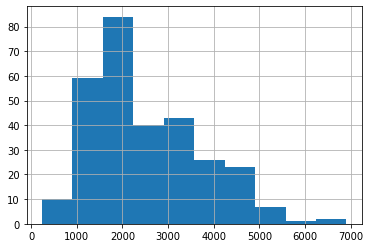

In [34]:
df.price_per_qm.hist();

---

# Create Berlin dataframe `df_berlin`

Steps:

* Run `create_df_all` to create dataframe containing all information (i.e. all pages) for Berlin
* Calculate the `price_per_qm`
* Save output to csv file

In [35]:
df_berlin = create_df_all(base_url, 'berlin').reset_index(drop=True)

In [36]:
df_berlin.head(1000)

,id,title,city,quarter,price,qm,n_room,n_page
0,113926252,Sofort bezugsfrei / 2 Zimmer / ca. 47m² / mit SieMatic Einbauküche / mit Balkon,Berlin,Wilmersdorf (Wilmersdorf),402000.00,47.00,2.0,1
1,111202876,IMMERGRÜN Berlin-Pankow - Neue Stadtwohnungen - provisionsfrei,Berlin,Pankow (Pankow),279500.00,43.51,1.5,1
2,93680992,GRANDAIRE - Erster neuer Wohnturm in Berlin-Mitte - provisionsfrei,Berlin,Mitte (Mitte),459500.00,54.40,2.0,1
3,115267620,Dachgeschosswohnung mit fantastischer Aussicht,Berlin,Tempelhof (Tempelhof),1657478.00,192.73,5.0,1
4,112049836,"Vermietete, provisionsfreie Kapitalanlage im Herzen von Pankow - keine Eigennutzung",Berlin,Pankow (Pankow),135500.00,44.59,2.0,1
5,113453317,Bezugsfreies 1-Zimmerapartment in Mitte nahe Alex - provisionsfrei,Berlin,Mitte (Mitte),199500.00,33.38,1.0,1
6,115294939,Möblierte Stadtwohnung mit Balkon und Stellplatz nahe Gendarmenmarkt,Berlin,Mitte (Mitte),1050000.00,90.00,2.0,1
7,113338733,Penthouse-Rarität mit Rooftop-Terrasse & exklusiver Ausstattung in Top-Lage! Provisionsfrei !,Berlin,Friedrichshain (Friedrichshain),1111900.00,135.66,3.0,1
8,100347907,Ihr kleines Gartenglück mit Terrasse im Friedrichshainer Kiez inkl. Einbauküche! Erstbezug !,Berlin,Friedrichshain (Friedrichshain),407400.00,66.98,1.0,1
9,104266437,Mein Rückzugsort – Dachterrassenwohnung mt großzügigen Zimmern und Echtholzparkett,Berlin,Spandau (Spandau),449000.00,82.51,3.0,1


<font color="red"><b>TODO:</b> add a function that takes in a dataframe and a list of column names and returns a dataframe where the provided column names are transformed into numeric data type.</font>

Currently, this is manually done in the `calc_price_per_qm` function below

In [57]:
# input df has to have the columns 'price' and 'qm'
def calc_price_per_qm(df):

    df['price'] = pd.to_numeric(df['price'])
    df['qm'] = pd.to_numeric(df['qm'])
    df['n_room'] = pd.to_numeric(df['n_room'])
    df['n_page'] = pd.to_numeric(df['n_page'])
    df['price_per_qm'] = np.where(df['qm'] != 0, round(df['price'] / df['qm'], 1), np.NaN)
    
    return df

In [58]:
df_berlin = calc_price_per_qm(df_berlin)

In [59]:
df_berlin.head(3)

,id,title,city,quarter,price,qm,n_room,n_page,price_per_qm
0,113926252,Sofort bezugsfrei / 2 Zimmer / ca. 47m² / mit SieMatic Einbauküche / mit Balkon,Berlin,Wilmersdorf (Wilmersdorf),402000.0,47.00,2.0,1,8553.2
1,111202876,IMMERGRÜN Berlin-Pankow - Neue Stadtwohnungen - provisionsfrei,Berlin,Pankow (Pankow),279500.0,43.51,1.5,1,6423.8
2,93680992,GRANDAIRE - Erster neuer Wohnturm in Berlin-Mitte - provisionsfrei,Berlin,Mitte (Mitte),459500.0,54.40,2.0,1,8446.7


In [60]:
df_berlin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 9 columns):
id              6770 non-null object
title           6770 non-null object
city            6770 non-null object
quarter         6770 non-null object
price           6770 non-null float64
qm              6770 non-null float64
n_room          6770 non-null float64
n_page          6770 non-null int64
price_per_qm    6764 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 476.1+ KB


### Save `df_berlin` to csv file

In [61]:
df_berlin.to_csv(path_op + '20200122_apts_buy_berlin_v0.1_CB.csv')

---

# EDA with `df_berlin`

#### Check whether numeric columns have numeric dtypes

In [62]:
df_berlin.iloc[:, 4:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 5 columns):
price           6770 non-null float64
qm              6770 non-null float64
n_room          6770 non-null float64
n_page          6770 non-null int64
price_per_qm    6764 non-null float64
dtypes: float64(4), int64(1)
memory usage: 264.6 KB


#### Check the distribution of `price_per_qm`

In [68]:
bins_p_per_qm = []
for i in range(30):
    bins_p_per_qm.append(i*500)

bins_p_per_qm

[0,
 500,
 1000,
 1500,
 2000,
 2500,
 3000,
 3500,
 4000,
 4500,
 5000,
 5500,
 6000,
 6500,
 7000,
 7500,
 8000,
 8500,
 9000,
 9500,
 10000,
 10500,
 11000,
 11500,
 12000,
 12500,
 13000,
 13500,
 14000,
 14500]

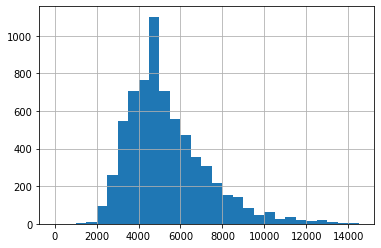

In [69]:
df_berlin['price_per_qm'].hist(bins=bins_p_per_qm);

In [73]:
bins_p = []
for i in range(100):
    bins_p.append(i*10000)

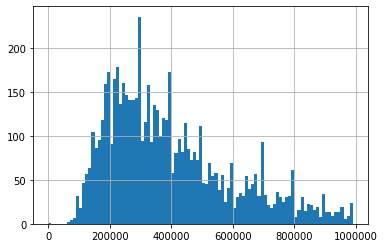

In [74]:
df_berlin['price'].hist(bins=bins_p);